In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,10)

In [7]:
str_files = ''
#Carrega os dados do arquivo .csv
df_ugrhi06 = pd.read_csv(str_files + "cetesb_concatenado06semoutliers.csv",encoding='utf-8',sep=',',index_col=[0])

#Carrega os dados do arquivo .csv
df_ugrhi10 = pd.read_csv(str_files + "cetesb_concatenado10semoutliers.csv",encoding='utf-8',sep=',')

In [8]:
print('---- Tamanho dos conjuntos originais ----')
print('ugrhi06:',len(df_ugrhi06))
print('ugrhi10:',len(df_ugrhi10))

#Seleciona os dados equivalente ao tamanho da URGHI10
df_ugrhi06 = df_ugrhi06.iloc[0:len(df_ugrhi10)]

#Seleciona os valores da coluna ph da URGHI06, na qual será utilizado para a normalização dos dados quando apresentar o gráfico
#train_previsao = ugrhi06['ph'].values
#train_previsao = train_previsao.reshape(len(train_previsao),1)

print('---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----')
print('ugrhi06:',len(df_ugrhi06))
print('ugrhi10:',len(df_ugrhi10))

---- Tamanho dos conjuntos originais ----
ugrhi06: 503
ugrhi10: 502
---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----
ugrhi06: 502
ugrhi10: 502


In [12]:
def pega_index_coluna_ugrhi10(p):
    
    index_coluna = 0
    
    if (p == 'solido'):
        index_coluna = 0
    elif (p == 'ph'):
        index_coluna = 1
    elif (p == 'coliformes'):
        index_coluna = 2 
    elif (p == 'dbo'):
        index_coluna = 3
    elif (p == 'fosforo'):
        index_coluna = 4
    elif (p == 'od'):
        index_coluna = 5 
    elif (p == 'temperatura'):
        index_coluna = 6 
    elif (p == 'turbidez'):
        index_coluna = 7
        
    return index_coluna

# OBS.: O parâmetro temperatura não possui correlação suficiente para este tipo de experimento.
def seleciona_colunas(trainingd,p,ugrhi):
    
    posicao_coluna = 0
    frame_completo = pd.DataFrame()
    
    if (ugrhi == 6):
            
        if (p == 'ph'):
            fcoliformes = trainingd.iloc[:,1:2].values
            fdbo        = trainingd.iloc[:,2:3].values
            fph         = trainingd.iloc[:,0:1].values
            fsolido     = trainingd.iloc[:,5:6].values

            frame_completo = pd.DataFrame(list(zip(fcoliformes,fdbo,fsolido,fph)),columns =['coliformes','dbo','solido','ph']) 
            posicao_coluna = 3

        elif (p == 'od'):
            fod      = trainingd.iloc[:,4:5].values
            fsolido  = trainingd.iloc[:,5:6].values

            frame_completo = pd.DataFrame(list(zip(fsolido,fod)),columns =['solido','od']) 
            posicao_coluna = 1

        elif (p == 'coliformes'):
            fph          = trainingd.iloc[:,0:1].values
            fcoliformes  = trainingd.iloc[:,1:2].values

            frame_completo = pd.DataFrame(list(zip(fph,fcoliformes)),columns =['ph','coliformes']) 
            posicao_coluna = 1

        elif (p == 'dbo'):
            #ph, fosforo, solido tem correlação com o dbo
            fph      = trainingd.iloc[:,0:1].values
            fdbo     = trainingd.iloc[:,2:3].values
            ffosforo = trainingd.iloc[:,3:4].values
            fsolido  = trainingd.iloc[:,5:6].values

            frame_completo = pd.DataFrame(list(zip(fph,ffosforo,fsolido,fdbo)),columns =['ph','fosforo','solido','dbo']) 
            posicao_coluna = 3

        elif (p == 'fosforo'):
            # dbo e solido tem correlação com o fosforo
            fdbo     = trainingd.iloc[:,2:3].values
            ffosforo = trainingd.iloc[:,3:4].values
            fsolido  = trainingd.iloc[:,5:6].values

            frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,ffosforo)),columns =['dbo','solido','fosforo']) 
            posicao_coluna = 2

        elif (p == 'solido'):
            # ph, dbo, fosforo, od, solido e turbidez tem correlação com o solido
            fph        = trainingd.iloc[:,0:1].values
            fdbo       = trainingd.iloc[:,2:3].values
            ffosforo   = trainingd.iloc[:,3:4].values
            fod        = trainingd.iloc[:,4:5].values
            fsolido    = trainingd.iloc[:,5:6].values
            fturbidez  = trainingd.iloc[:,7:8].values

            frame_completo = pd.DataFrame(list(zip(fph,fdbo,ffosforo,fod,fturbidez,fsolido)),
                                      columns =['ph','dbo','fosforo','od','turidez','solido']) 
            posicao_coluna = 5

        elif (p == 'turbidez'):
            # solido e turbidez tem correlação com o turbidez

            fsolido    = trainingd.iloc[:,5:6].values
            fturbidez  = trainingd.iloc[:,7:8].values

            frame_completo = pd.DataFrame(list(zip(fsolido,fturbidez)),columns =['solido','turidez']) 
            posicao_coluna = 1
        
    elif (ugrhi == 10):
        
        if (p == 'ph'):
            fcoliformes = trainingd.iloc[:,2:3].values
            fdbo        = trainingd.iloc[:,3:4].values
            fph         = trainingd.iloc[:,1:2].values
            fsolido     = trainingd.iloc[:,0:1].values

            frame_completo = pd.DataFrame(list(zip(fcoliformes,fdbo,fsolido,fph)),columns =['coliformes','dbo','solido','ph']) 
            posicao_coluna = 3

        elif (p == 'od'):
            fod      = trainingd.iloc[:,5:6].values
            fsolido  = trainingd.iloc[:,0:1].values

            frame_completo = pd.DataFrame(list(zip(fsolido,fod)),columns =['solido','od']) 
            posicao_coluna = 1

        elif (p == 'coliformes'):
            fph          = trainingd.iloc[:,1:2].values
            fcoliformes  = trainingd.iloc[:,2:3].values

            frame_completo = pd.DataFrame(list(zip(fph,fcoliformes)),columns =['ph','coliformes']) 
            posicao_coluna = 1

        elif (p == 'dbo'):
            #ph, fosforo, solido tem correlação com o dbo
            fph      = trainingd.iloc[:,1:2].values
            fdbo     = trainingd.iloc[:,3:4].values
            ffosforo = trainingd.iloc[:,4:5].values
            fsolido  = trainingd.iloc[:,0:1].values

            frame_completo = pd.DataFrame(list(zip(fph,ffosforo,fsolido,fdbo)),columns =['ph','fosforo','solido','dbo']) 
            posicao_coluna = 3

        elif (p == 'fosforo'):
            # dbo e solido tem correlação com o fosforo
            fdbo     = trainingd.iloc[:,3:4].values
            ffosforo = trainingd.iloc[:,4:5].values
            fsolido  = trainingd.iloc[:,0:1].values

            frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,ffosforo)),columns =['dbo','solido','fosforo']) 
            posicao_coluna = 2

        elif (p == 'solido'):
            # ph, dbo, fosforo, od, solido e turbidez tem correlação com o solido
            fph        = trainingd.iloc[:,1:2].values
            fdbo       = trainingd.iloc[:,3:4].values
            ffosforo   = trainingd.iloc[:,4:5].values
            fod        = trainingd.iloc[:,5:6].values
            fsolido    = trainingd.iloc[:,0:1].values
            fturbidez  = trainingd.iloc[:,7:8].values

            frame_completo = pd.DataFrame(list(zip(fph,fdbo,ffosforo,fod,fturbidez,fsolido)),
                                      columns =['ph','dbo','fosforo','od','turidez','solido']) 
            posicao_coluna = 5

        elif (p == 'turbidez'):
            # solido e turbidez tem correlação com o turbidez

            fsolido    = trainingd.iloc[:,0:1].values
            fturbidez  = trainingd.iloc[:,7:8].values

            frame_completo = pd.DataFrame(list(zip(fsolido,fturbidez)),columns =['solido','turidez']) 
            posicao_coluna = 1
        
    return frame_completo,posicao_coluna
'''
def seleciona_colunas(trainingd,ug):
    
    if (ug == 6):
        fdbo     = trainingd.iloc[:,2:3].values
        fph      = trainingd.iloc[:,0:1].values
        fsolido  = trainingd.iloc[:,5:6].values
    
        frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,fph)),columns =['dbo','solido','ph']) 
    else:
        fdbo     = trainingd.iloc[:,3:4].values
        fph      = trainingd.iloc[:,1:2].values
        fsolido  = trainingd.iloc[:,0:1].values
    
        frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,fph)),columns =['dbo','solido','ph'])
        
    
    return frame_completo

def seleciona_colunas_od(trainingd,ug):
   
    if (ug == 6):
        fdbo     = trainingd.iloc[:,2:3].values
        fod      = trainingd.iloc[:,4:5].values
        fsolido  = trainingd.iloc[:,5:6].values
   
        frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,fod)),columns =['dbo','solido','od'])
    else:
        fdbo     = trainingd.iloc[:,3:4].values
        fod      = trainingd.iloc[:,5:6].values
        fsolido  = trainingd.iloc[:,0:1].values
   
        frame_completo = pd.DataFrame(list(zip(fdbo,fsolido,fod)),columns =['dbo','solido','od'])
       
   
    return frame_completo
'''

def pegar_dados_coluna_predita_train_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train = trainingd.iloc[0:int(len(data)*percent),:].values  
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
    test = trainingd.iloc[len(train):,index_coluna:index_coluna+1].values
    
    return train,train_previsao, test

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
def normalizacao(train,test):
    sc = MinMaxScaler()
    testd = test
    train = sc.fit_transform(train)
    test = sc.fit_transform(test)    
    return train,test,testd

#Prepara o conjunto de dados em X e y, considerando a janela de visualização (lags).
#cy = coluna que será predita
def prepara_dados(dados,lags,cy):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i,:])
        y.append(dados[i, cy])
       
    return np.array(X), np.array(y)

#Calcula o MAPE
#Define função para calcular o MAPE
#def mape(y_pred,y_true):
 #   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(y_pred,y_true):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    '''  
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        
        print(real)
        mape = mape_sum/len(real)
    '''
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

def rquadrado(y_pred,y_true):
    #Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
    #É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.
    y_traco = np.mean(y_true)
    
    print('media y_true:', y_traco)
        
    stq = 0
    
    for s in y_true:
        a = s - y_traco
        st = a * a
        stq = stq + st
    
    print('Soma Total dos Quadrados (STQ):', stq[0])
    
    #Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
    #É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.
    squ = 0
    
    y_traco = np.mean(y_pred)
    print('media y_pred:', y_traco)
    
    for n in range(len(y_true)):
        a = y_true[n] - y_pred[n]
        st = a * a
        squ = squ + st
        
    print('Soma dos Quadrados dos Resíduos (SQU):',squ[0])
    print('\n')
    print('Fórmula do R²')
    print('\n')
    print('sqr = stq - squ')
    sqr = stq[0] - squ[0]
    print('R² = sqr/stq')
    sqr = sqr/stq[0]
    print('\n')
    return sqr

def correlacao_determinacao(dtframe,tipo):
    
    if (tipo == 0): #Treino
        resultado = dtframe.corr().previsao_treino.values[1] ** 2 
    else: #teste
        resultado = dtframe.corr().previsao_teste.values[1] ** 2
    
    return resultado

def ajusta_array(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

def ajusta_lista(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

In [15]:
df_resultado_medio_g = pd.DataFrame()

index_coluna = 0

parametro = []
tecnica   = []

#média
media_parametro_mape_treino = []
media_parametro_rmse_treino = []
media_parametro_r_treino    = []
    
media_parametro_mape_teste  = []
media_parametro_rmse_teste  = []
media_parametro_r_teste     = []
    
#desvio_padrão
    
std_parametro_mape_treino = []
std_parametro_rmse_treino = []
std_parametro_r_treino    = []
    
std_parametro_mape_teste  = []
std_parametro_rmse_teste  = []
std_parametro_r_teste     = []

for p in ('ph','coliformes', 'dbo','fosforo','od','solido','turbidez'):
    
    print('Agora é a vez do parâmetro:', p)
   
    ugrhi06,posicao_col06   = seleciona_colunas(df_ugrhi06,p,6)
    ugrhi10,posicao_col10   = seleciona_colunas(df_ugrhi10,p,10)
    #index_coluna10 = pega_index_coluna_ugrhi10(p)
          
    #index_coluna = index_coluna + 1

    df_resultados_treino = pd.DataFrame()
    df_resultados_teste  = pd.DataFrame()
    df_resultados        = pd.DataFrame()
    
    media_lag_mape_treino = []
    media_lag_rmse_treino = []
    media_lag_r_treino    = []
        
    media_lag_mape_teste = []
    media_lag_rmse_teste = []
    media_lag_r_teste    = []
    
    for l in range(1, 16):
    
        lags = l

        #seleciona os dados

        train06,train_previsao06, test06 = pegar_dados_coluna_predita_train_test(ugrhi06,0.70,posicao_col06) 
        train10,train_previsao10, test10 = pegar_dados_coluna_predita_train_test(ugrhi10,0.70,posicao_col10) 

        #normalização dos dados
        train06,test06,testd06 = normalizacao(train06,test06)
        train10,test10,testd10 = normalizacao(train10,test10)

        normalizador_previsao = MinMaxScaler()
        sc = MinMaxScaler()
        normalizador_previsao.fit_transform(train_previsao06)

        #Prepara os dados de treinamento -ugrhi06
        #Vai predizer o valor da coluna 4 (valor ph)
        train_X06, train_y06 = prepara_dados(train06, lags,posicao_col06)

        #Prepara os dados de teste
        entradas06 = ugrhi06[len(ugrhi06) - len(test06) - lags:].values
        entradas06 = sc.fit_transform(entradas06)   

        test_X06 = []
        for i in range(lags, lags+len(test06)):
            test_X06.append(entradas06[i-lags:i, 0:posicao_col06+1])
        test_X06 = np.array(test_X06)

        #Ajusta a dimensão de test_X e train_X
        nsamples, nx, ny = test_X06.shape
        test_X06 = test_X06.reshape((nsamples,nx*ny))

        nsamples, nx, ny = train_X06.shape
        train_X06 = train_X06.reshape((nsamples,nx*ny))

        #Prepara os dados de treinamento -ugrhi10
        #Aqui vamos pegar test_X10.
        train_X10, train_y10 = prepara_dados(train10, lags,posicao_col10)

        #Prepara os dados de teste
        entradas10 = ugrhi10[len(ugrhi10) - len(test10) - lags:].values
        entradas10 = sc.fit_transform(entradas10)   

        test_X10 = []
        for i in range(lags, lags+len(test10)):
            test_X10.append(entradas10[i-lags:i, 0:posicao_col10+1])
        test_X10 = np.array(test_X10)

        #Ajusta a dimensão de test_X10 
        nsamples, nx, ny = test_X10.shape
        test_X10 = test_X10.reshape((nsamples,nx*ny))

        nsamples, nx, ny = train_X10.shape
        train_X10 = train_X10.reshape((nsamples,nx*ny))

        #Cria o modelo
        model = RandomForestRegressor()

        #Treina o modelo
        model.fit(train_X06,train_y06)
        score = model.score(train_X06,train_y06)
        #print(score)

        #Dados de teste
        previsoes = model.predict(test_X10)
        previsoes = previsoes.reshape(-1, 1)
        previsoes = normalizador_previsao.inverse_transform(previsoes)

        #print('Teste - Gráficos com lag', l)
        '''
        #Plotagem do gráfico
        plt.plot(testd10,color='red',label = 'Observado')
        plt.plot(previsoes,color='blue',label = 'Previsoes')
        plt.xlabel('Tempo')
        plt.ylabel('Valor pH')
        plt.legend()
        plt.show()
        '''

        #Dados de treino
        previsoes_treino = model.predict(train_X10)
        previsoes_treino = previsoes_treino.reshape(-1, 1)
        previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)


        #print('Treinamento - Gráficos com lag', l)
        '''
        #Plotagem do gráfico
        plt.plot(train_previsao10,color='red',label = 'Observado')
        plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
        plt.xlabel('Tempo')
        plt.ylabel('Valor pH')
        plt.legend()
        plt.show()
        '''

        treino = train_previsao10[lags: len(previsoes_treino) + lags, :]
        observado_test = testd10

        observado_treino = train_previsao10

        treino         = ajusta_array(treino)
        observado_test = ajusta_array(observado_test)

        #Calculo do erro da previsão MAPE, RMSE e R²

        observado_treino_d = observado_treino
        previsoes_treino_d = previsoes_treino
        previsoes_d        = previsoes

        mape_treino_d        = round(mape(previsoes_treino,treino),4)
        rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
        #r_treino_d           = round(r2(previsoes_treino,treino),4)

        mape_teste_d        = round(mape(previsoes,observado_test),4)
        rmse_teste_d        = round(rmse(previsoes,observado_test),4)
        #r_teste_d           = round(r2(previsoes,observado_test),4) 

        df_corr_determinacao_treino = pd.DataFrame()
        df_corr_determinacao_teste  = pd.DataFrame()

        #Calcula o coeficiente de determinação
        dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_array(treino)} 

        df_treino = pd.DataFrame(dict)
        dframes_treino = [df_corr_determinacao_treino,df_treino]
        df_corr_determinacao_treino = pd.concat(dframes_treino)

        dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_array(observado_test)} 

        df_teste = pd.DataFrame(dict)
        dframes_teste = [df_corr_determinacao_teste,df_teste]
        df_corr_determinacao_teste = pd.concat(dframes_teste)

        r_treino_d = []
        r_teste_d  = []

        r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
        r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
        
        media_lag_mape_treino.append(np.mean(mape_treino_d))
        media_lag_rmse_treino.append(np.mean(rmse_treino_d))
        media_lag_r_treino.append(np.mean(r_treino_d))
        
        media_lag_mape_teste.append(np.mean(mape_teste_d))
        media_lag_rmse_teste.append(np.mean(rmse_teste_d))
        media_lag_r_teste.append(np.mean(r_teste_d))
        
    #index_coluna = index_coluna + 1        
                
    #média
    media_parametro_mape_treino.append(np.mean(media_lag_mape_treino))
    media_parametro_rmse_treino.append(np.mean(media_lag_rmse_treino))
    media_parametro_r_treino.append(np.mean(media_lag_r_treino))
    
    media_parametro_mape_teste.append(np.mean(media_lag_mape_teste))
    media_parametro_rmse_teste.append(np.mean(media_lag_rmse_teste))
    media_parametro_r_teste.append(np.mean(media_lag_r_teste))
        
    #desvio_padrão
    
    #std_parametro_mape_treino.append(np.std(media_lag_mape_treino))
    std_parametro_rmse_treino.append(np.std(media_lag_rmse_treino))
    #std_parametro_r_treino.append(np.std(media_lag_r_treino))
    
    #std_parametro_mape_teste.append(np.std(media_lag_mape_teste))
    std_parametro_rmse_teste.append(np.std(media_lag_rmse_teste))
    #std_parametro_r_teste.append(np.std(media_lag_r_teste))
        
    parametro.append(p)
    tecnica.append('RF (Var. selec.)')

dict = {'tecnica': tecnica,
        'parametro': parametro,
        'mape_treino':  media_parametro_mape_treino, 
        'rmse_treino':  media_parametro_rmse_treino, 'std_rmse_treino':  std_parametro_rmse_treino,
        'r_quad_treino':media_parametro_r_treino,    
        'mape_teste':   media_parametro_mape_teste,  
        'rmse_teste':   media_parametro_rmse_teste,  'std_rmse_teste':   std_parametro_rmse_teste,
        'r_quad_teste': media_parametro_r_teste}
   
df_resultado_final = pd.DataFrame(dict)

dframes = [df_resultado_medio_g,df_resultado_final]
df_resultado_medio_g = pd.concat(dframes)

df_resultado_medio_g.round(2)

Agora é a vez do parâmetro: ph
Agora é a vez do parâmetro: coliformes
Agora é a vez do parâmetro: dbo
Agora é a vez do parâmetro: fosforo
Agora é a vez do parâmetro: od
Agora é a vez do parâmetro: solido
Agora é a vez do parâmetro: turbidez


,tecnica,parametro,mape_treino,rmse_treino,std_rmse_treino,r_quad_treino,mape_teste,rmse_teste,std_rmse_teste,r_quad_teste
0,RF (Var. selec.),ph,6.60,0.49,0.01,0.10,5.67,0.43,0.02,0.01
1,RF (Var. selec.),coliformes,2029894.00,1729196.29,18273.02,0.26,3170752.98,1309228.13,38184.66,0.27
2,RF (Var. selec.),dbo,109.68,11.23,0.29,0.42,147.89,13.75,0.54,0.11
3,RF (Var. selec.),fosforo,118.81,0.42,0.01,0.25,223.00,0.55,0.01,0.02
4,RF (Var. selec.),od,48.21,2.39,0.02,0.08,46.10,2.13,0.02,0.01
5,RF (Var. selec.),solido,15.40,48.48,1.81,0.29,18.67,60.79,1.56,0.01
6,RF (Var. selec.),turbidez,43.84,14.59,0.21,0.10,50.50,17.71,0.31,0.05


In [16]:
df_resultado_medio_g.round(2).to_csv (r'C:\Users\Anderson\predicaoagua\src\src_dissertação\resultados\rf_espaco_temporal_var_selec.csv', index = True, header=True)

In [6]:
ugrhi06 = seleciona_colunas_od(df_ugrhi06,6)
ugrhi10 = seleciona_colunas_od(df_ugrhi10,10)
df_resultados_treino = pd.DataFrame()
df_resultados_teste = pd.DataFrame()
df_resultados = pd.DataFrame()

print(ugrhi06)
print(ugrhi10)

#lags = (3,5,7) 
#for l in range(1, 9, 2):
for l in range(1, 21):
    
    lags = l
    
    #seleciona os dados
    
    train06,train_previsao06, test06 = pegar_dados_coluna_predita_train_test(ugrhi06,0.70,2) 
    train10,train_previsao10, test10 = pegar_dados_coluna_predita_train_test(ugrhi10,0.70,2) 
    
    #normalização dos dados
    train06,test06,testd06 = normalizacao(train06,test06)
    train10,test10,testd10 = normalizacao(train10,test10)
    
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao06)
    
    #Prepara os dados de treinamento -ugrhi06
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X06, train_y06 = prepara_dados(train06, lags,2)
        
    #Prepara os dados de teste
    entradas06 = ugrhi06[len(ugrhi06) - len(test06) - lags:].values
    entradas06 = sc.fit_transform(entradas06)   
    
    test_X06 = []
    for i in range(lags, lags+len(test06)):
        test_X06.append(entradas06[i-lags:i, 0:3])
    test_X06 = np.array(test_X06)
    
    #Ajusta a dimensão de test_X e train_X
    nsamples, nx, ny = test_X06.shape
    test_X06 = test_X06.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X06.shape
    train_X06 = train_X06.reshape((nsamples,nx*ny))
    
    #Prepara os dados de treinamento -ugrhi10
    #Aqui vamos pegar test_X10.
    train_X10, train_y10 = prepara_dados(train10, lags,2)
        
    #Prepara os dados de teste
    entradas10 = ugrhi10[len(ugrhi10) - len(test10) - lags:].values
    entradas10 = sc.fit_transform(entradas10)   
    
    test_X10 = []
    for i in range(lags, lags+len(test10)):
        test_X10.append(entradas10[i-lags:i, 0:3])
    test_X10 = np.array(test_X10)
    
    #Ajusta a dimensão de test_X10 
    nsamples, nx, ny = test_X10.shape
    test_X10 = test_X10.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X10.shape
    train_X10 = train_X10.reshape((nsamples,nx*ny))
    
    #Cria o modelo
    model = RandomForestRegressor()
    
    #Treina o modelo
    model.fit(train_X06,train_y06)
    score = model.score(train_X06,train_y06)
    #print(score)

    #Dados de teste
    previsoes = model.predict(test_X10)
    previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
       
    print('Teste - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(testd10,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
    
    #Dados de treino
    previsoes_treino = model.predict(train_X10)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
    
    print('Treinamento - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(train_previsao10,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
    
    treino = train_previsao10[lags: len(previsoes_treino) + lags, :]
    observado_test = testd10
    
    observado_treino = train_previsao10
    
    treino         = ajusta_array(treino)
    observado_test = ajusta_array(observado_test)
               
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    observado_treino_d = observado_treino
    previsoes_treino_d = previsoes_treino
    previsoes_d        = previsoes
        
    mape_treino_d        = round(mape(previsoes_treino,treino),4)
    rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
    #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
    mape_teste_d        = round(mape(previsoes,observado_test),4)
    rmse_teste_d        = round(rmse(previsoes,observado_test),4)
    #r_teste_d           = round(r2(previsoes,observado_test),4) 
       
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
        
    #Calcula o coeficiente de determinação
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_array(treino)} 
    
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_array(observado_test)} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino_d = []
    r_teste_d  = []
    
    r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
    r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
    
    lag_treino = []
    lag_teste = []
    
    lag_treino.append(lags)
    lag_teste.append(lags)
        
    # dictionary of lists  
    
    dict = {'lags_treino': lag_treino, 'mape_treino': mape_treino_d, 'rmse_treino': rmse_treino_d,'r_quad_treino':r_treino_d,
            'lags_teste': lag_teste, 'mape_teste': mape_teste_d, 'rmse_teste': rmse_teste_d,'r_quad_teste':r_teste_d} 
    
    df_result = pd.DataFrame(dict)
    dframes = [df_resultados,df_result]
    df_resultados = pd.concat(dframes)
    
df_resultados.describe()

                      dbo                solido                    od
0    [19.932203389830512]  [291.30508474576266]  [1.2889830508474576]
1    [19.122792353533008]   [290.8506307561334]  [1.3555085519696617]
2    [18.226658706203636]   [290.3474852676153]  [1.4291617853549592]
3    [17.359432595884886]  [289.86057027872675]  [1.5004391079858923]
4    [16.463298948555508]  [289.35742479020865]  [1.5740923413711898]
..                    ...                   ...                   ...
497  [55.922077922077925]   [352.8438644688645]  [0.5470491803278689]
498   [41.02597402597402]  [344.76739926739924]                [0.42]
499  [26.129870129870127]  [336.69093406593413]                [0.72]
500  [11.714285714285715]             [328.875]             [2.25625]
501  [11.714285714285715]             [328.875]             [2.25625]

[502 rows x 3 columns]
                      dbo                solido                    od
0     [4.916666666666667]  [189.79166666666663]  [2.47166666666666

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,47.773295,2.391960,0.060890,10.50000,46.097320,2.149840,0.003815
std,5.91608,0.600444,0.017409,0.017267,5.91608,0.855713,0.034171,0.002984
min,1.00000,46.875200,2.364000,0.032700,1.00000,44.907600,2.100100,0.000000
25%,5.75000,47.438775,2.379850,0.045450,5.75000,45.551900,2.133075,0.001050
50%,10.50000,47.759800,2.389650,0.061650,10.50000,45.939750,2.149100,0.003600
75%,15.25000,47.959350,2.396350,0.076450,15.25000,46.593900,2.163850,0.005150
max,20.00000,49.557700,2.431900,0.089000,20.00000,48.490100,2.245100,0.010100


In [21]:
df_resultados

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
0,1,6.5773,0.5004,0.0582,1,6.0201,0.4646,0.0040
0,2,6.6346,0.5025,0.1002,2,5.7652,0.4427,0.0003
0,3,6.7014,0.5040,0.0960,3,5.8239,0.4434,0.0067
0,4,6.7979,0.5070,0.0997,4,6.0357,0.4562,0.0037
0,5,6.8263,0.5091,0.0979,5,6.0718,0.4581,0.0035
0,6,6.7408,0.5033,0.0862,6,6.1925,0.4660,0.0068
0,7,6.7242,0.5048,0.0767,7,6.1793,0.4670,0.0022
0,8,6.6854,0.4989,0.0876,8,6.1032,0.4586,0.0015
0,9,6.7294,0.5010,0.1040,9,6.0570,0.4534,0.0020
0,10,6.6924,0.4989,0.1017,10,5.9089,0.4395,0.0032


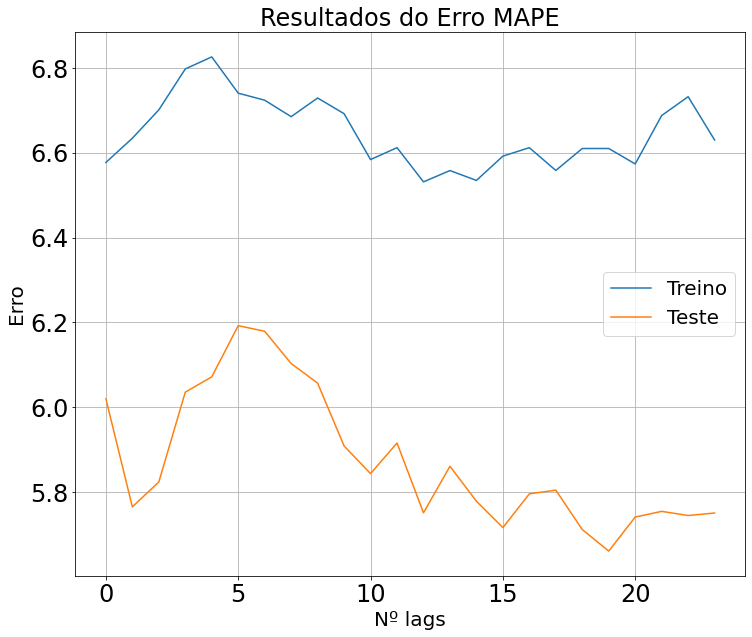

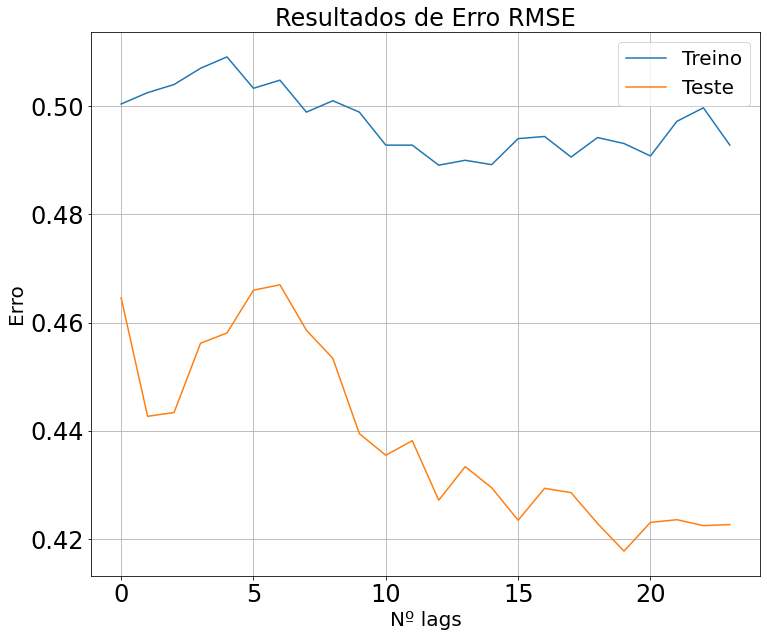

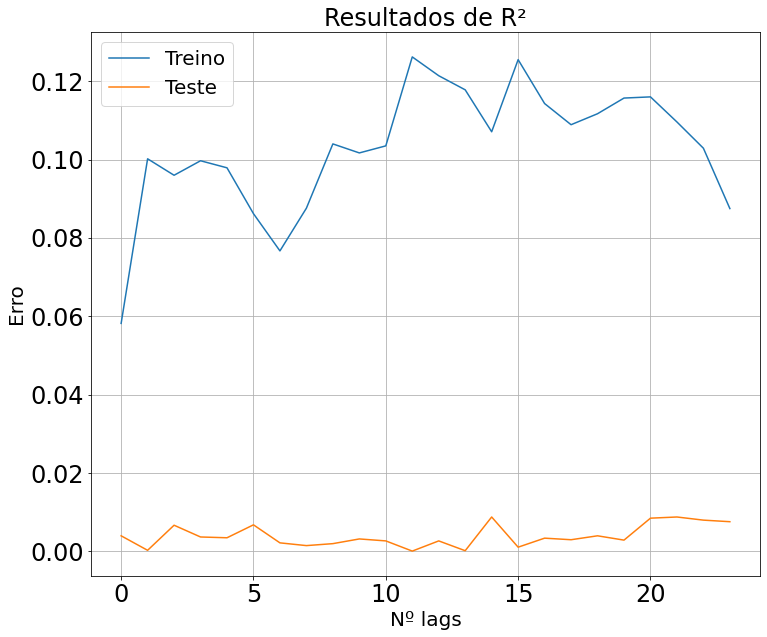

In [22]:
plt.plot(df_resultados.mape_treino.values,label = 'Treino')
plt.plot(df_resultados.mape_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados do Erro MAPE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.rmse_treino.values,label = 'Treino')
plt.plot(df_resultados.rmse_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de Erro RMSE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.r_quad_treino.values,label = 'Treino')
plt.plot(df_resultados.r_quad_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de R²')
plt.legend()
plt.grid()
plt.show()